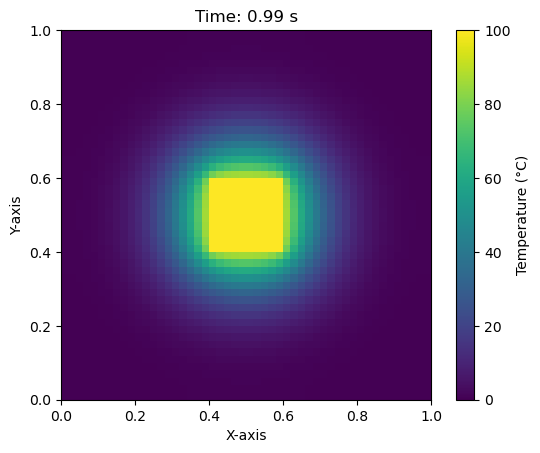

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
alpha = 0.01        # Thermal diffusivity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
X, Y = np.meshgrid(x, y)

# Time parameters
total_time = 1.0    # Total simulation time (seconds)
num_time_steps = 100
dt = total_time / num_time_steps

# Initial temperature distribution
initial_temperature = np.zeros((num_points_x, num_points_y))
initial_temperature[int(0.4 * num_points_x):int(0.6 * num_points_x), int(0.4 * num_points_y):int(0.6 * num_points_y)] = 100.0

# Create plot
fig, ax = plt.subplots()
plot = ax.imshow(initial_temperature, extent=[0, length_x, 0, length_y], origin='lower', cmap='viridis')
ax.set_title('2D Heat Equation Solver')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
cbar = plt.colorbar(plot, ax=ax, label='Temperature (°C)')

# Function to update the plot for each time step
def update(frame):
    global initial_temperature

    # Finite difference solution
    temperature = initial_temperature.copy()

    temperature[1:-1, 1:-1] += alpha * dt * (
        (temperature[:-2, 1:-1] - 2 * temperature[1:-1, 1:-1] + temperature[2:, 1:-1]) / dx**2 +
        (temperature[1:-1, :-2] - 2 * temperature[1:-1, 1:-1] + temperature[1:-1, 2:]) / dy**2
    )

    # Apply user-controlled boundary conditions
    temperature[:, 0] = temperature[:, 1]  # Left boundary (copy values from the next column)
    temperature[:, -1] = temperature[:, -2]  # Right boundary (copy values from the previous column)
    temperature[0, :] = temperature[1, :]  # Top boundary (copy values from the next row)
    temperature[-1, :] = temperature[-2, :]  # Bottom boundary (copy values from the previous row)

    # Update center to a fixed temperature value (e.g., 50°C)
    temperature[int(0.4 * num_points_x):int(0.6 * num_points_x), int(0.4 * num_points_y):int(0.6 * num_points_y)] = 100.0

    initial_temperature = temperature.copy()

    # Update plot data
    plot.set_data(temperature)
    ax.set_title(f'Time: {frame * dt:.2f} s')
    display(fig)  # Display the updated plot inline
    clear_output(wait=True)  # Clear the previous output for a clean display
    time.sleep(0.01)  # Add a small delay for rendering

# Display each frame inline
for frame in range(num_time_steps):
    update(frame)
    time.sleep(0.01)  # Add a small delay between frames for better visualization








##### 

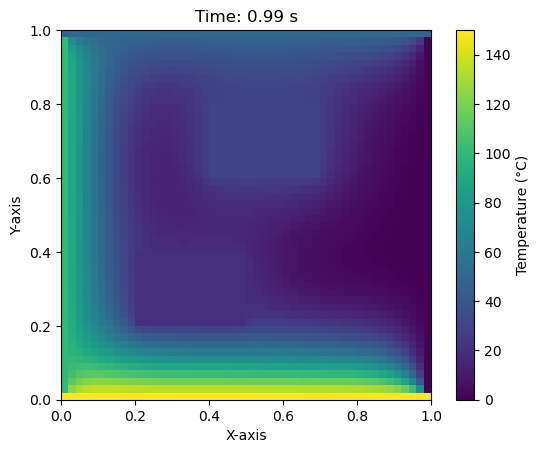

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
alpha = 0.01        # Thermal diffusivity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
X, Y = np.meshgrid(x, y)

# Time parameters
total_time = 1.0    # Total simulation time (seconds)
num_time_steps = 100
dt = total_time / num_time_steps

# Initial temperature distribution
initial_temperature = np.zeros((num_points_x, num_points_y))

# Define heat sources
heat_source_1 = {
    'position_x': [0.2, 0.4],
    'position_y': [0.2, 0.5],
    'temperature': 20.0
}

heat_source_2 = {
    'position_x': [0.6, 0.8],
    'position_y': [0.4, 0.7],
    'temperature': 30.0
}

# Set initial temperature based on heat sources
# Apply Dirichlet boundary conditions for each heat source
for source in [heat_source_1, heat_source_2]:
    source_x_start = int(source['position_x'][0] * num_points_x)
    source_x_end = int(source['position_x'][1] * num_points_x)
    source_y_start = int(source['position_y'][0] * num_points_y)
    source_y_end = int(source['position_y'][1] * num_points_y)

    initial_temperature[source_x_start:source_x_end, source_y_start:source_y_end] = source['temperature']
# Apply Dirichlet boundary conditions to all four boundaries
initial_temperature[:, 0] = 100.0  # Left boundary
initial_temperature[:, -1] = 0.0  # Right boundary
initial_temperature[0, :] = 150.0  # Top boundary
initial_temperature[-1, :] = 50.0  # Bottom boundary


# Create plot
fig, ax = plt.subplots()
plot = ax.imshow(initial_temperature, extent=[0, length_x, 0, length_y], origin='lower', cmap='viridis')
ax.set_title('2D Heat Equation Solver')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
cbar = plt.colorbar(plot, ax=ax, label='Temperature (°C)')

# Function to update the plot for each time step
def update(frame):
    global initial_temperature

    # Finite difference solution
    temperature = initial_temperature.copy()

    temperature[1:-1, 1:-1] += alpha * dt * (
        (temperature[:-2, 1:-1] - 2 * temperature[1:-1, 1:-1] + temperature[2:, 1:-1]) / dx**2 +
        (temperature[1:-1, :-2] - 2 * temperature[1:-1, 1:-1] + temperature[1:-1, 2:]) / dy**2
    )

    # Apply Dirichlet boundary conditions for each heat source
    for source in [heat_source_1, heat_source_2]:
        source_x_start = int(source['position_x'][0] * num_points_x)
        source_x_end = int(source['position_x'][1] * num_points_x)
        source_y_start = int(source['position_y'][0] * num_points_y)
        source_y_end = int(source['position_y'][1] * num_points_y)

        temperature[source_x_start:source_x_end, source_y_start:source_y_end] = source['temperature']

    initial_temperature = temperature.copy()

    # Update plot data
    plot.set_data(temperature)
    ax.set_title(f'Time: {frame * dt:.2f} s')
    display(fig)  # Display the updated plot inline
    clear_output(wait=True)  # Clear the previous output for a clean display
    time.sleep(0.01)  # Add a small delay for rendering

# Display each frame inline
for frame in range(num_time_steps):
    update(frame)
    time.sleep(0.01)  # Add a small delay between frames for better visualization


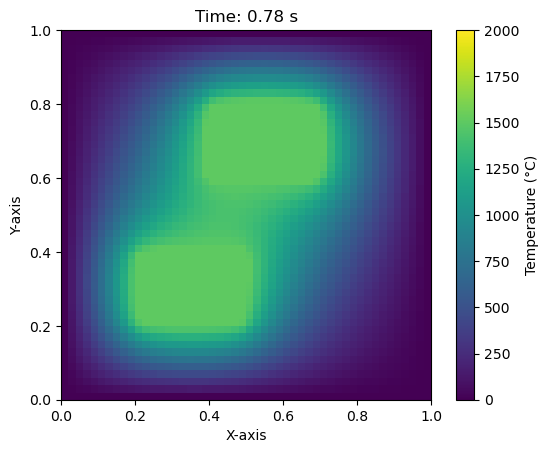

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
alpha = 0.05        # Thermal diffusivity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
X, Y = np.meshgrid(x, y)

# Time parameters
total_time = 10.0    # Total simulation time (seconds)
num_time_steps = 5000
dt = total_time / num_time_steps

# Define a function for the initial temperature distribution (Gaussian at the center)
def initial_temperature_distribution(x, y):
    x_center = length_x / 2
    y_center = length_y / 2
    sigma_x = length_x / 5
    sigma_y = length_y / 5
    return 50 * np.exp(-((x - x_center)**2 / (2 * sigma_x**2) + (y - y_center)**2 / (2 * sigma_y**2)))

# Initial temperature distribution
initial_temperature = initial_temperature_distribution(X, Y)

# Define heat sources
heat_source_1 = {
    'position_x': [0.2, 0.4],
    'position_y': [0.2, 0.5],
    'temperature': 150.0
}

heat_source_2 = {
    'position_x': [0.6, 0.8],
    'position_y': [0.4, 0.7],
    'temperature': 150.0
}

# Create plot
fig, ax = plt.subplots()
plot = ax.imshow(initial_temperature, extent=[0, length_x, 0, length_y], origin='lower', cmap='viridis', vmin=0, vmax=2000)
ax.set_title('2D Heat Equation Solver')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
cbar = plt.colorbar(plot, ax=ax, label='Temperature (°C)')

# Function to update the plot for each time step
def update(frame):
    global initial_temperature

    # Finite difference solution
    updated_temperature = initial_temperature.copy()

    # Apply Dirichlet boundary conditions for each heat source
    for source in [heat_source_1, heat_source_2]:
        source_x_start = int(source['position_x'][0] * num_points_x)
        source_x_end = int(source['position_x'][1] * num_points_x)
        source_y_start = int(source['position_y'][0] * num_points_y)
        source_y_end = int(source['position_y'][1] * num_points_y)

        # Add the source temperature only starting from frame 50
        if frame >= 50:
            delta_temperature = source['temperature'] * alpha * dt / (dx**2 + dy**2)
            updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end] = 150

    # Apply diffusion
    updated_temperature[1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

    # Apply Dirichlet boundary conditions to all four boundaries
    updated_temperature[:, 0] = 0.0  # Left boundary
    updated_temperature[:, -1] = 0.0  # Right boundary
    updated_temperature[0, :] = 0.0  # Top boundary
    updated_temperature[-1, :] = 0.0  # Bottom boundary
 # Apply constraints
    updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
    updated_temperature[updated_temperature > np.max([heat_source_1['temperature'], heat_source_2['temperature']])] = np.max([heat_source_1['temperature'], heat_source_2['temperature']])
   
    # Update initial temperature for the next iteration
    initial_temperature = updated_temperature.copy()

    # Update plot data
    plot.set_data(updated_temperature)
    ax.set_title(f'Time: {frame * dt:.2f} s')
    display(fig)  # Display the updated plot inline
    clear_output(wait=True)  # Clear the previous output for a clean display
    time.sleep(0.01)  # Add a small delay between frames for better visualization

# Display each frame in line
for frame in range(num_time_steps):
    update(frame)
    time.sleep(0.01)  # Add a small delay between frames for better visualization


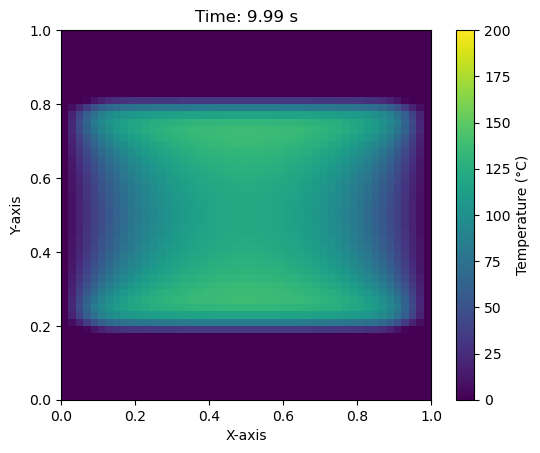

In [208]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
alpha = 0.01      # Thermal diffusivity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
X, Y = np.meshgrid(x, y)

# Time parameters
total_time = 10.0    # Total simulation time (seconds)
num_time_steps = 1000
dt = total_time / num_time_steps

# Define a function for the initial temperature distribution (Gaussian at the center)
def initial_temperature_distribution(x, y):
    x_center = length_x / 2
    y_center = length_y / 2
    sigma_x = length_x / 5
    sigma_y = length_y / 5
    return 150 * np.exp(-((x - x_center)**2 / (2 * sigma_x**2) + (y - y_center)**2 / (2 * sigma_y**2)))

# Initial temperature distribution
initial_temperature = initial_temperature_distribution(X, Y)

# Define heat sources
heat_source_1 = {
    'position_x': [0.0, 0.2],
    'position_y': [0.0, 1.0],
    'temperature': 150.0
}

heat_source_2 = {
    'position_x': [0.8, 1.0],
    'position_y': [0.0, 1.0],
    'temperature': 150.0
}

# Create plot
fig, ax = plt.subplots()
plot = ax.imshow(initial_temperature, extent=[0, length_x, 0, length_y], origin='lower', cmap='viridis', vmin=0, vmax=200)
ax.set_title('2D Heat Equation Solver')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
cbar = plt.colorbar(plot, ax=ax, label='Temperature (°C)')

# Function to update the plot for each time step
def update(frame):
    global initial_temperature

    # Finite difference solution
    updated_temperature = initial_temperature.copy()

    # Apply Dirichlet boundary conditions for each heat source
    for source in [heat_source_1, heat_source_2]:
        source_x_start = int(source['position_x'][0] * num_points_x)
        source_x_end = int(source['position_x'][1] * num_points_x)
        source_y_start = int(source['position_y'][0] * num_points_y)
        source_y_end = int(source['position_y'][1] * num_points_y)

        # Add the source temperature only starting from frame 50 and before frame 300
        if 50 <= frame < 990:
        
            updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end] = 150

        # Remove the source temperature after frame 300
        elif frame >= 990:
            delta_temperature = source['temperature'] * alpha * dt / (dx**2 + dy**2)
            updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end] -= delta_temperature

    # Apply diffusion
    updated_temperature[1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

    # Apply Dirichlet boundary conditions to all four boundaries
    updated_temperature[:, 0] = 0.0  # Left boundary
    updated_temperature[:, -1] = 0.0  # Right boundary
    updated_temperature[0, :] = 0.0  # Top boundary
    updated_temperature[-1, :] = 0.0  # Bottom boundary

    # Apply constraints
    updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
    updated_temperature[updated_temperature > np.max([heat_source_1['temperature'], heat_source_2['temperature']])] = np.max([heat_source_1['temperature'], heat_source_2['temperature']])
    #Temperature should not be higher than source or heat exchange will not continue
    # Update initial temperature for the next iteration
    initial_temperature = updated_temperature.copy()

    # Update plot data
    plot.set_data(updated_temperature)
    ax.set_title(f'Time: {frame * dt:.2f} s')
    display(fig)  # Display the updated plot inline
    clear_output(wait=True)  # Clear the previous output for a clean display
    time.sleep(0.01)  # Add a small delay between frames for better visualization

# Display each frame in line
for frame in range(num_time_steps):
    update(frame)
    time.sleep(0.01)  # Add a small delay between frames for better visualization


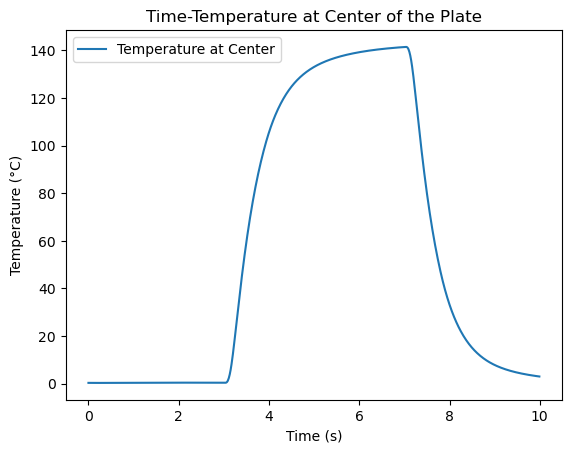

In [3]:
# Track the temperature at the center of the plate over time
center_temperature_history = []

# Function to update the plot for each time step
def update(frame):
    global initial_temperature

    # Finite difference solution
    updated_temperature = initial_temperature.copy()

    # Apply Dirichlet boundary conditions for each heat source
    for source in [heat_source_1, heat_source_2]:
        source_x_start = int(source['position_x'][0] * num_points_x)
        source_x_end = int(source['position_x'][1] * num_points_x)
        source_y_start = int(source['position_y'][0] * num_points_y)
        source_y_end = int(source['position_y'][1] * num_points_y)

        # Add the source temperature only starting from frame 50 and before frame 300
        if 300 <= frame < 700:
            delta_temperature = source['temperature'] * alpha * dt / (dx**2 + dy**2)
            updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end] += delta_temperature

        # Remove the source temperature after frame 300
        elif frame >= 700:
            delta_temperature = source['temperature'] * alpha * dt / (dx**2 + dy**2)
            updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end] -= delta_temperature

    # Apply diffusion
    updated_temperature[1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

    # Apply Dirichlet boundary conditions to all four boundaries
    updated_temperature[:, 0] = 0.0  # Left boundary
    updated_temperature[:, -1] = 0.0  # Right boundary
    updated_temperature[0, :] = 0.0  # Top boundary
    updated_temperature[-1, :] = 0.0  # Bottom boundary

    # Apply constraints
    updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
    updated_temperature[updated_temperature > np.max([heat_source_1['temperature'], heat_source_2['temperature']])] = np.max([heat_source_1['temperature'], heat_source_2['temperature']])
    
    # Track the temperature at the center of the plate
    center_temperature_history.append(updated_temperature[int(num_points_x / 2), int(num_points_y / 2)])

    # Update initial temperature for the next iteration
    initial_temperature = updated_temperature.copy()

# Display each frame in line
for frame in range(num_time_steps):
    update(frame)

# Plotting the time-temperature curve at the center of the plate
plt.figure()
plt.plot(np.arange(len(center_temperature_history)) * dt, center_temperature_history, label='Temperature at Center')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Time-Temperature at Center of the Plate')
plt.legend()
plt.show()


